<a href="https://colab.research.google.com/github/caglakacar/analysis_project/blob/main/Emergency_Resource_Allocation_Algorithm_(Earthquake).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Priority Order of Disaster Regions Table:

+--------------------------------------------------------------------+
|  Rank  |     Region      |   Severity   |    Damage    | Transport |
+--------------------------------------------------------------------+
|   1    |      Hatay      |      9       |     600      |     3     |
|   2    |  Kahramanmaraş  |      8       |     550      |     3     |
|   3    |     Malatya     |      8       |     450      |     4     |
|   4    |    Gaziantep    |      7       |     400      |     1     |
|   5    |    Adıyaman     |      6       |     400      |     2     |
|   6    |    Şanlıurfa    |      4       |     150      |     5     |
+--------------------------------------------------------------------+



Resource Allocation Table:

+---------------------------------+
|     Region      |   Resources   |
+---------------------------------+
|      Hatay      |      24       |
|  Kahramanmaraş  |      22       |
|     Malatya     |      18       |

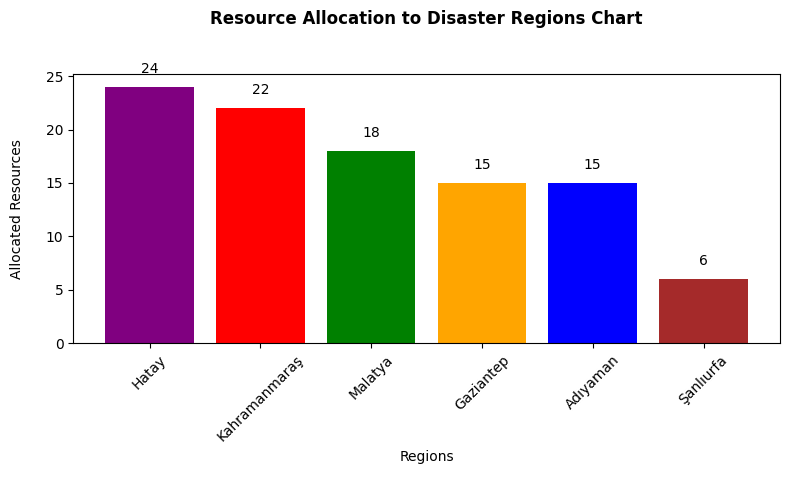

In [ ]:
import sys
import time
import random
import matplotlib.pyplot as plt

def calculate_priority_scores(disaster_regions):
    """
    Calculates priority scores for disaster-affected regions and sorts them by priority.

    Args:
        disaster_regions (list of tuples): [(severity, damage, transportation, name)] for each region.
            - transportation: Values from 1 to 5 indicating ease of access, 1 is hardest, 5 is easiest.

    Returns:
        list: Regions sorted by descending priority score.
    """
    if not isinstance(disaster_regions, list) or len(disaster_regions) == 0:
        raise ValueError("Invalid input: 'disaster_regions' should be a non-empty list.")

    # Calculate scores using weighted criteria
    scored_regions = [(2 * severity + 1.5 * damage + 1 * transportation, severity, damage, transportation, name)
                      for severity, damage, transportation, name in disaster_regions]
    # Sort regions by score in descending order
    scored_regions.sort(key=lambda x: -x[0])
    return scored_regions

def allocate_resources(disaster_regions, total_resources):
    """
    Allocates resources to disaster regions based on their priority scores.

    Args:
        disaster_regions (list of tuples): [(score, severity, damage, transportation, name)].
        total_resources (int): Total number of resources available.

    Returns:
        list: Number of resources allocated to each region.
    """
    if total_resources <= 0:
        raise ValueError("Invalid input: 'total_resources' should be greater than 0.")

    # Initialize allocation and remaining resources
    allocations = [0] * len(disaster_regions)
    remaining_resources = total_resources
    total_score = sum(score for score, _, _, _, _ in disaster_regions)

    # Allocate resources proportional to scores
    for i, (score, _, _, _, _) in enumerate(disaster_regions):
        allocated = min(remaining_resources, max(1, int((score / total_score) * total_resources)))
        allocations[i] = allocated
        remaining_resources -= allocated

    # Distribute any remaining resources proportionally
    for i, (score, _, _, _, _) in enumerate(disaster_regions):
        if remaining_resources == 0:
            break
        additional_allocation = min(remaining_resources, max(1, int((score / total_score) * remaining_resources)))
        allocations[i] += additional_allocation
        remaining_resources -= additional_allocation

    return allocations

def visualize_resource_allocation(sorted_regions, allocations):
    """
    Visualizes resource allocation across regions using a bar chart.

    Args:
        sorted_regions (list of tuples): Regions sorted by priority.
        allocations (list): Allocated resources for each region.
    """
    region_names = [name for _, _, _, _, name in sorted_regions]

    # Define custom colors for the bars
    colors = ["purple", "red", "green", "orange", "blue", "brown"]

    plt.figure(figsize=(8, 5))
    bars = plt.bar(region_names, allocations, color=colors[:len(region_names)])

    # Add values on top of the bars
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 1, int(yval), ha='center', va='bottom')

    plt.title("Resource Allocation to Disaster Regions Chart\n\n", fontweight="bold")
    plt.xlabel("Regions\n")
    plt.ylabel("Allocated Resources\n")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

def main():
    # Example regions affected by a disaster
    disaster_regions = [
        (8, 550, 3, "Kahramanmaraş"),
        (6, 400, 2, "Adıyaman"),
        (8, 450, 4, "Malatya"),
        (7, 400, 1, "Gaziantep"),
        (4, 150, 5, "Şanlıurfa"),
        (9, 600, 3, "Hatay"),
    ]

    total_resources = 100  # Total resources available

    # Calculate priority scores and sort regions
    sorted_regions = calculate_priority_scores(disaster_regions)

    # Allocate resources
    allocations = allocate_resources(sorted_regions, total_resources)

    # Display priority table
    print("\nPriority Order of Disaster Regions Table:\n")
    print("+" + "-" * 68 + "+")
    print(f"| {'Rank':^6} | {'Region':^15} | {'Severity':^12} | {'Damage':^12} | {'Transport':^6} |")
    print("+" + "-" * 68 + "+")
    for i, (score, severity, damage, transport, name) in enumerate(sorted_regions):
        print(f"| {i+1:^6} | {name:^15} | {severity:^12} | {damage:^12} | {transport:^9} |")
    print("+" + "-" * 68 + "+")
    print ("\n")

    # Display resource allocation table
    print("\nResource Allocation Table:\n")
    print("+" + "-" * 33 + "+")
    print(f"| {'Region':^15} | {'Resources':^13} |")
    print("+" + "-" * 33 + "+")
    for i, (_, _, _, _, name) in enumerate(sorted_regions):
        print(f"| {name:^15} | {allocations[i]:^13} |")
    print("+" + "-" * 33 + "+")
    print ("\n")

    # Visualize resource allocation
    visualize_resource_allocation(sorted_regions, allocations)

if __name__ == "__main__":
    main()

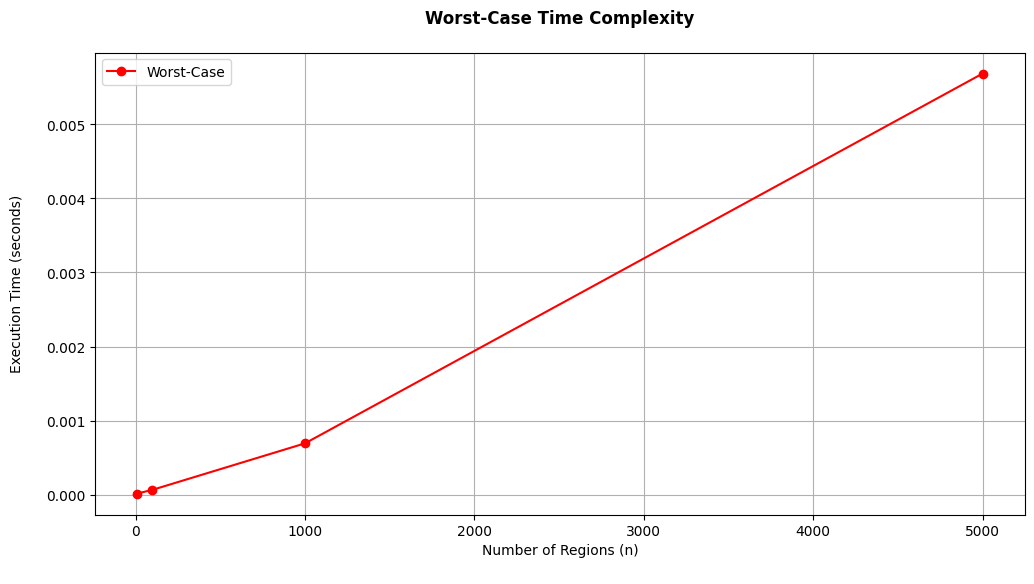

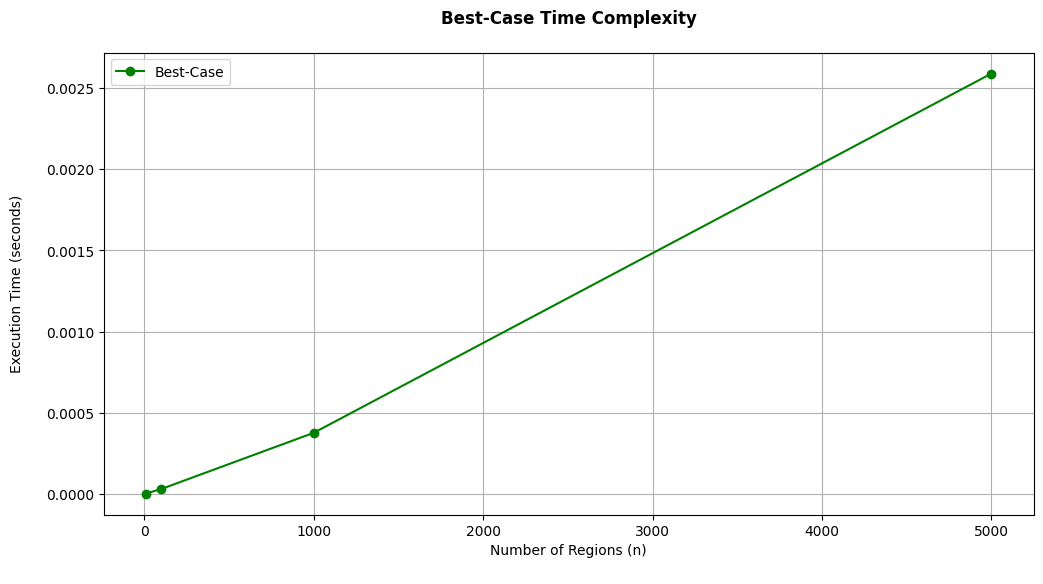

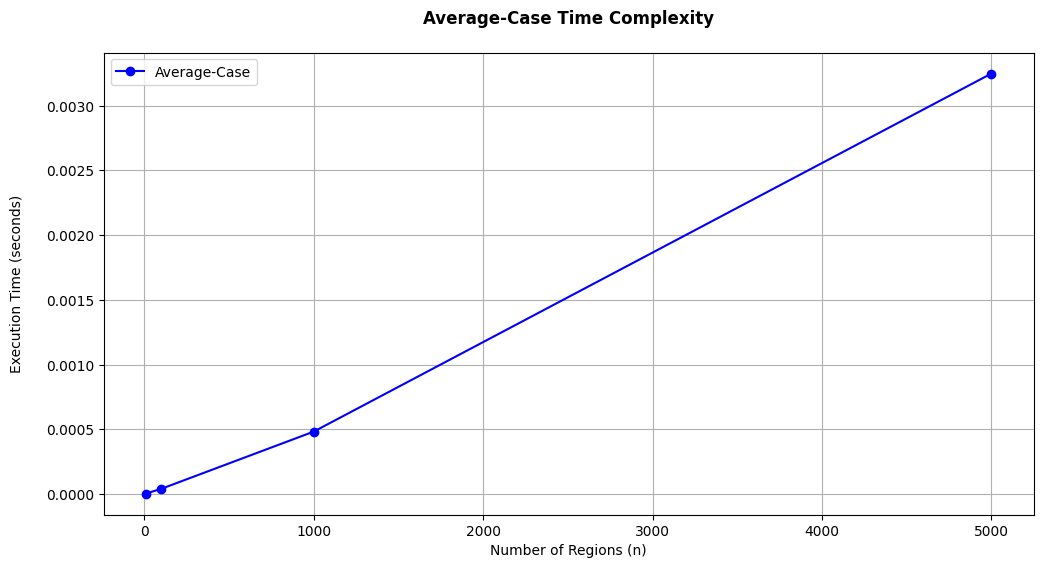

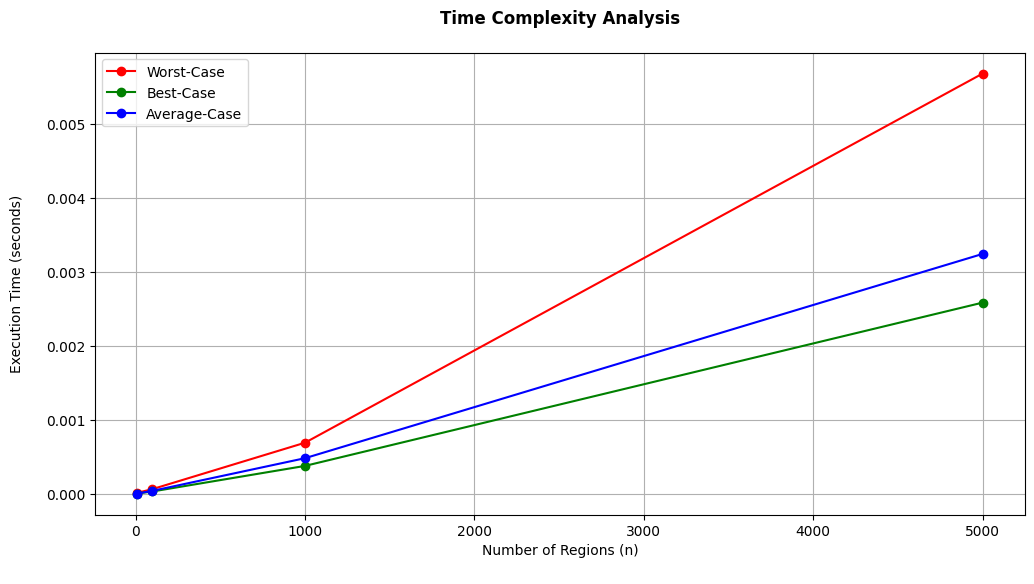

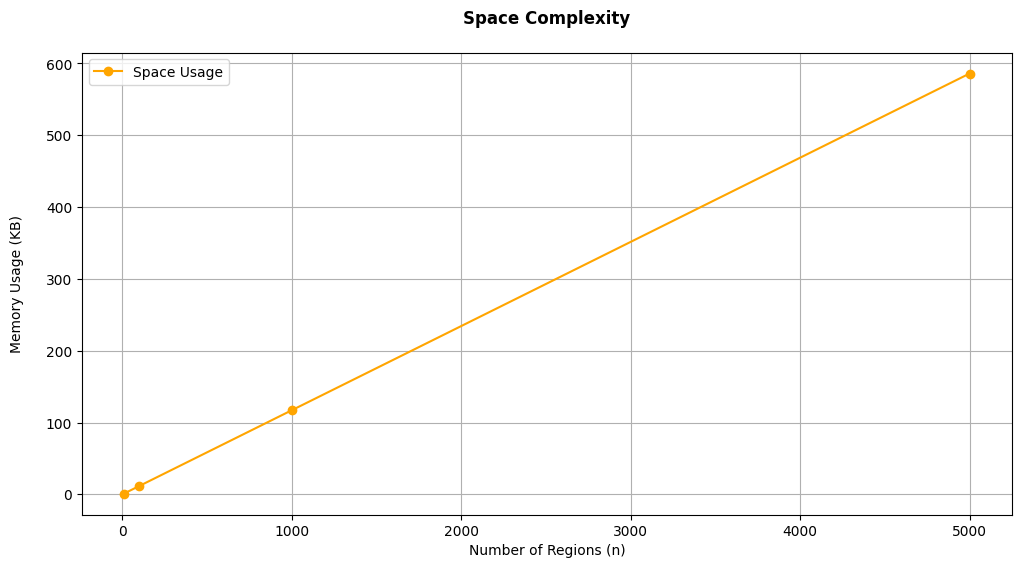

In [ ]:
import sys
import time
import random
import matplotlib.pyplot as plt

# Re-implementing the priority score calculation function for analysis
def calculate_priority_scores(disaster_regions):

    scored_regions = [(2 * severity + 1.5 * damage + 1 * transportation, severity, damage, transportation, name)
                      for severity, damage, transportation, name in disaster_regions]
    scored_regions.sort(key=lambda x: -x[0])
    return scored_regions

# Simulation parameters
random.seed(42)
data_sizes = [10, 100, 1000, 5000]
worst_case_times = []
best_case_times = []
average_case_times = []
space_usage = []

for size in data_sizes:
    # Generate test data
    worst_case_data = [(random.randint(1, 10), random.randint(100, 600), random.randint(1, 5), f"Region {i}") for i in range(size)]
    best_case_data = sorted(worst_case_data, key=lambda x: 2 * x[0] + 1.5 * x[1] + x[2], reverse=True)
    average_case_data = random.sample(worst_case_data, len(worst_case_data))

    # Measure time for worst-case
    start_time = time.time()
    calculate_priority_scores(worst_case_data)
    worst_case_times.append(time.time() - start_time)

    # Measure time for best-case
    start_time = time.time()
    calculate_priority_scores(best_case_data)
    best_case_times.append(time.time() - start_time)

    # Measure time for average-case
    start_time = time.time()
    calculate_priority_scores(average_case_data)
    average_case_times.append(time.time() - start_time)

    # Space complexity calculation
    input_space = sum(sys.getsizeof(item) for item in worst_case_data)
    intermediate_space = size * (5 * 8)  # Estimated intermediate data space
    result_space = size * 8  # Estimated result space
    total_space = input_space + intermediate_space + result_space
    space_usage.append(total_space / 1024)  # Convert to KB

# Plotting the time complexity results
# Worst-case graph
plt.figure(figsize=(12, 6))
plt.plot(data_sizes, worst_case_times, marker='o', label="Worst-Case", color='red')
plt.title("Worst-Case Time Complexity\n", fontweight="bold")
plt.xlabel("Number of Regions (n)\n")
plt.ylabel("Execution Time (seconds)\n")
plt.legend()
plt.grid(True)
plt.show()
print ("\n")

# Best-case graph
plt.figure(figsize=(12, 6))
plt.plot(data_sizes, best_case_times, marker='o', label="Best-Case", color='green')
plt.title("Best-Case Time Complexity\n", fontweight="bold")
plt.xlabel("Number of Regions (n)\n")
plt.ylabel("Execution Time (seconds)\n")
plt.legend()
plt.grid(True)
plt.show()
print ("\n")

# Average-case graph
plt.figure(figsize=(12, 6))
plt.plot(data_sizes, average_case_times, marker='o', label="Average-Case", color='blue')
plt.title("Average-Case Time Complexity\n", fontweight="bold")
plt.xlabel("Number of Regions (n)\n")
plt.ylabel("Execution Time (seconds)\n")
plt.legend()
plt.grid(True)
plt.show()
print ("\n")

# Plotting individual time complexity graphs
plt.figure(figsize=(12, 6))
plt.plot(data_sizes, worst_case_times, marker='o', label="Worst-Case", color='red')
plt.plot(data_sizes, best_case_times, marker='o', label="Best-Case", color='green')
plt.plot(data_sizes, average_case_times, marker='o', label="Average-Case", color='blue')
plt.title("Time Complexity Analysis\n", fontweight="bold")
plt.xlabel("Number of Regions (n)\n")
plt.ylabel("Execution Time (seconds)\n")
plt.legend()
plt.grid(True)
plt.show()
print ("\n")

# Plotting space complexity
plt.figure(figsize=(12, 6))
plt.plot(data_sizes, space_usage, marker='o', label="Space Usage", color='orange')
plt.title("Space Complexity\n", fontweight="bold")
plt.xlabel("Number of Regions (n)\n")
plt.ylabel("Memory Usage (KB)\n")
plt.legend()
plt.grid(True)
plt.show()

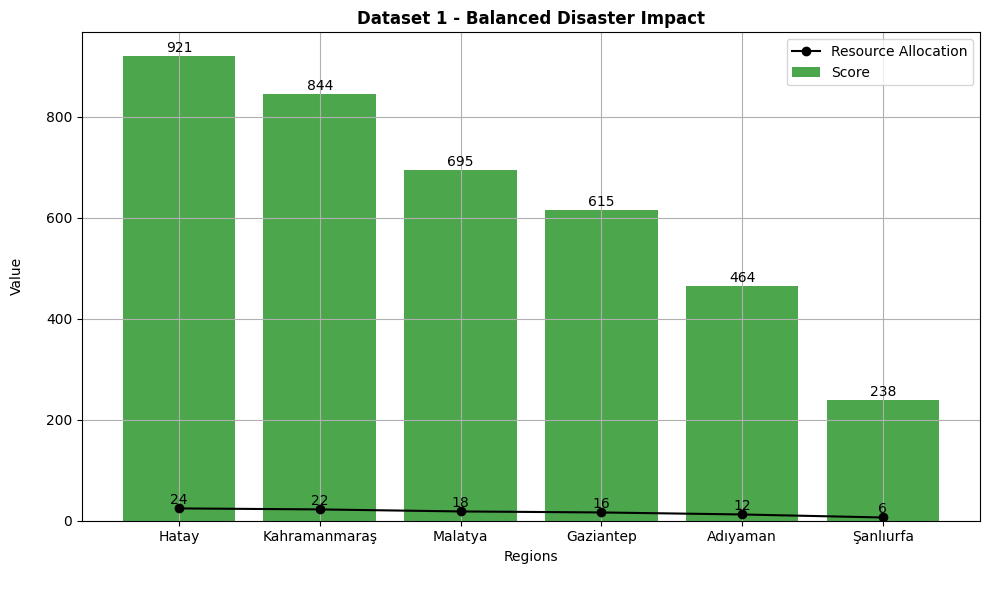

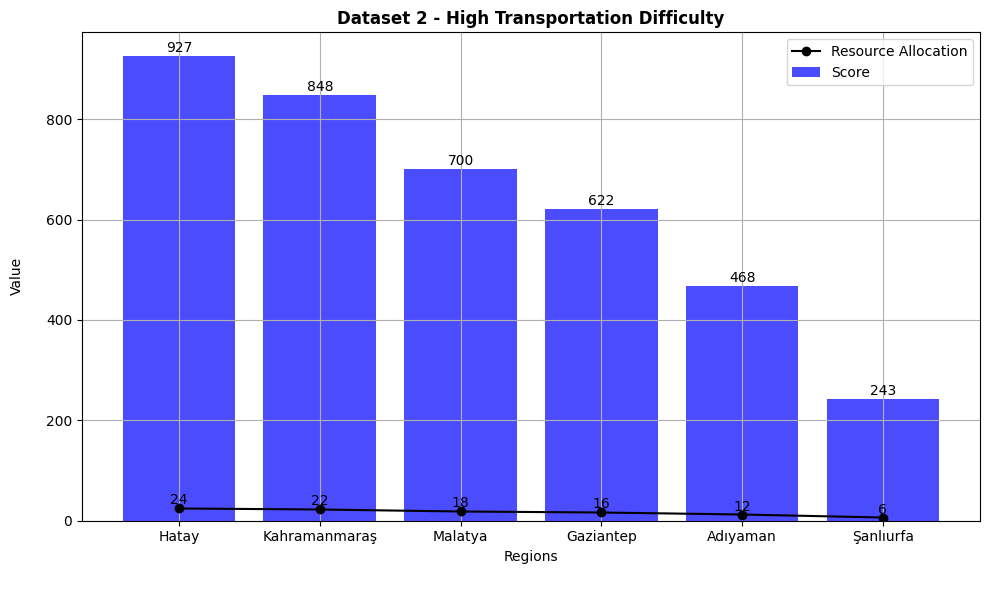

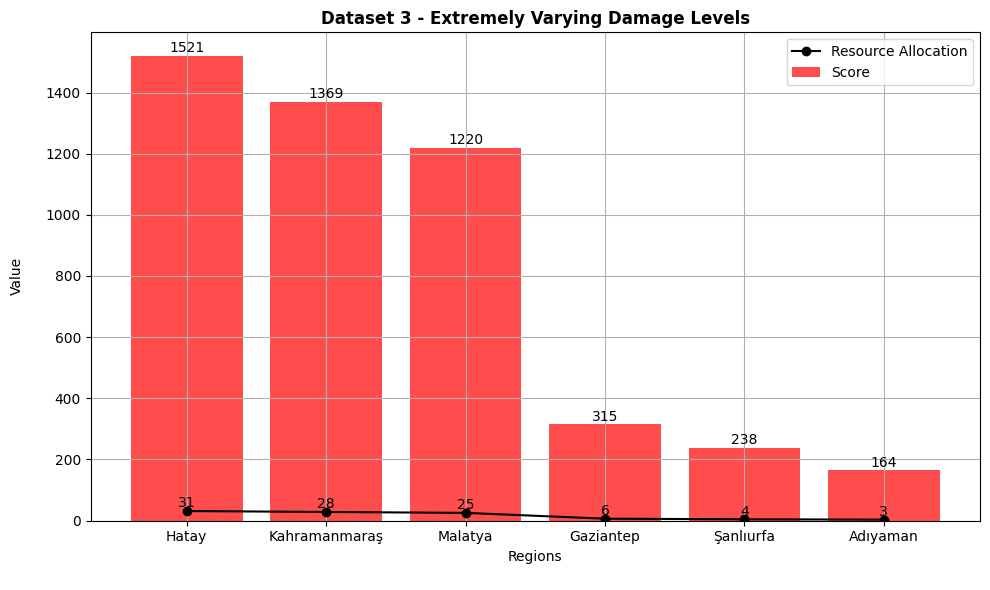

In [ ]:
import matplotlib.pyplot as plt

def calculate_priority_scores(disaster_regions):
    return sorted(
        [(2 * severity + 1.5 * damage + 1 * transportation, severity, damage, transportation, name)
         for severity, damage, transportation, name in disaster_regions],
        key=lambda x: -x[0]
    )

def allocate_resources(disaster_regions, total_resources):
    allocations = []
    total_score = sum(score for score, *_ in disaster_regions)
    remaining_resources = total_resources
    for score, *_ in disaster_regions:
        allocation = min(remaining_resources, max(1, int((score / total_score) * total_resources)))
        allocations.append(allocation)
        remaining_resources -= allocation
    return allocations

def visualize_resource_allocation(sorted_regions, allocations, color, title):
    region_names = [name for _, _, _, _, name in sorted_regions]
    scores = [score for score, *_ in sorted_regions]

    plt.figure(figsize=(10, 6))

    # Create bar chart
    bars = plt.bar(region_names, scores, color=color, alpha=0.7, label="Score")
    plt.plot(region_names, allocations, marker="o", color="black", label="Resource Allocation")

    # Add values to the bars
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, yval + 2, f'{int(yval)}', ha='center', va='bottom')

    # Add values to the line plot
    for i, alloc in enumerate(allocations):
        plt.text(i, alloc + 2, f'{alloc}', ha='center', va='bottom', color='black')

    plt.title(title, fontweight="bold")
    plt.xlabel("Regions\n")
    plt.ylabel("Value\n")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    print ("\n")

# Data and settings
datasets = [
    [
        (8, 550, 3, "Kahramanmaraş"),
        (6, 300, 2, "Adıyaman"),
        (8, 450, 4, "Malatya"),
        (7, 400, 1, "Gaziantep"),
        (4, 150, 5, "Şanlıurfa"),
        (9, 600, 3, "Hatay")
    ],
    [
        (8, 550, 7, "Kahramanmaraş"),
        (6, 300, 6, "Adıyaman"),
        (8, 450, 9, "Malatya"),
        (7, 400, 8, "Gaziantep"),
        (4, 150, 10, "Şanlıurfa"),
        (9, 600, 9, "Hatay")
    ],
    [
        (8, 900, 3, "Kahramanmaraş"),
        (6, 100, 2, "Adıyaman"),
        (8, 800, 4, "Malatya"),
        (7, 200, 1, "Gaziantep"),
        (4, 150, 5, "Şanlıurfa"),
        (9, 1000, 3, "Hatay")
    ]
]
# Analyze and visualize each dataset
colors = ["green", "blue", "red"]
titles = [
    "Dataset 1 - Balanced Disaster Impact",
    "Dataset 2 - High Transportation Difficulty",
    "Dataset 3 - Extremely Varying Damage Levels"
]
total_resources = 100

for i, dataset in enumerate(datasets):
    sorted_regions = calculate_priority_scores(dataset)
    allocations = allocate_resources(sorted_regions, total_resources)
    visualize_resource_allocation(sorted_regions, allocations, colors[i], titles[i])

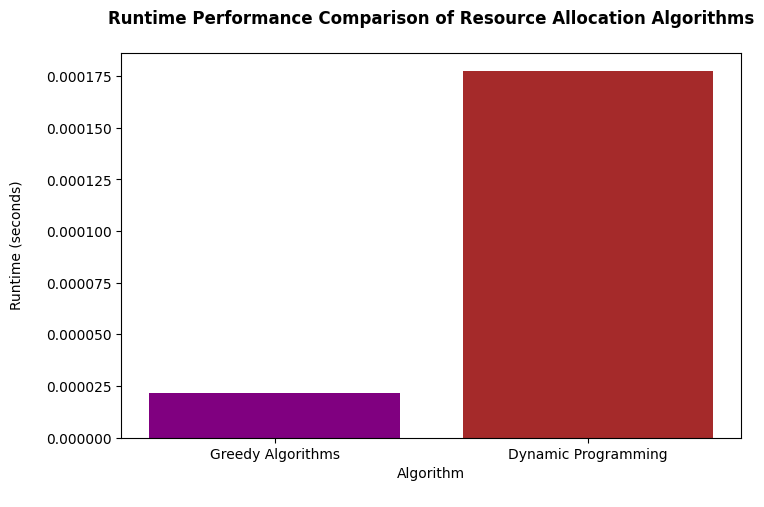


Greedy Algorithms Runtime: 0.000022 seconds
Dynamic Programming Runtime: 0.000178 seconds


In [ ]:
import time
import numpy as np
import matplotlib.pyplot as plt

def dynamic_allocate_resources(disaster_regions, total_resources):
    """
    Allocates resources using dynamic programming to maximize the total score.

    Args:
        disaster_regions (list of tuples): [(score, severity, damage, transportation, name)].
        total_resources (int): Total number of resources available.

    Returns:
        list: Number of resources allocated to each region.
    """
    n = len(disaster_regions)
    dp = [[0] * (total_resources + 1) for _ in range(n + 1)]

    for i in range(1, n + 1):
        score = int(disaster_regions[i - 1][0])
        for r in range(total_resources + 1):
            if r == 0:
                dp[i][r] = 0
            elif score <= r:
                dp[i][r] = max(dp[i - 1][r], dp[i - 1][r - score] + score)
            else:
                dp[i][r] = dp[i - 1][r]

    # Backtrack to find allocations
    allocations = [0] * n
    remaining_resources = total_resources

    for i in range(n, 0, -1):
        if dp[i][remaining_resources] != dp[i - 1][remaining_resources]:
            allocations[i - 1] = disaster_regions[i - 1][0]
            remaining_resources -= disaster_regions[i - 1][0]

    return allocations

def measure_runtime(function, *args):
    """
    Measures the runtime of a given function.

    Args:
        function (callable): Function to measure.
        *args: Arguments to pass to the function.

    Returns:
        float: Runtime in seconds.
    """
    start_time = time.time()
    function(*args)
    end_time = time.time()
    return end_time - start_time

# Example regions affected by a disaster
disaster_regions = [
    (8, 550, 3, "Kahramanmaraş"),
    (6, 400, 2, "Adıyaman"),
    (8, 450, 4, "Malatya"),
    (7, 400, 1, "Gaziantep"),
    (4, 150, 5, "Şanlıurfa"),
    (9, 600, 3, "Hatay"),
]
total_resources = 100

# Calculate priority scores and sort regions
sorted_regions = calculate_priority_scores(disaster_regions)

# Measure runtime for both algorithms
greedy_runtime = measure_runtime(allocate_resources, sorted_regions, total_resources)
dynamic_runtime = measure_runtime(dynamic_allocate_resources, sorted_regions, total_resources)

# Visualize the performance comparison
algorithms = ["Greedy Algorithms", "Dynamic Programming"]
runtimes = [greedy_runtime, dynamic_runtime]

plt.figure(figsize=(8, 5))
plt.bar(algorithms, runtimes, color=["purple", "brown"])
plt.xlabel("Algorithm\n")
plt.ylabel("Runtime (seconds)\n")
plt.title("Runtime Performance Comparison of Resource Allocation Algorithms\n", fontweight="bold")
plt.show()
print(f"\nGreedy Algorithms Runtime: {greedy_runtime:.6f} seconds")
print(f"Dynamic Programming Runtime: {dynamic_runtime:.6f} seconds")